In [2]:
import numpy as np

In [9]:
# constants
end_dist = 50
charge_points = 2

# time-varying
dist = np.zeros(10, dtype = int) # initialise distance travelled
final_soc = np.array([80, 59, 23, 65, 34, 90, 23, 80, 100, 67])
charge_state = np.zeros(10, dtype = int)

# Constant varables can be selected by monte carlo random selector

init_state = np.zeros((4, 10))
init_state[0] = np.array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1]) #init location
init_state[1] = np.array([1, 1, 2, 2, 5, 6, 2, 3, 8, 1]) #init start time
init_state[2] = np.array([4, 5, 6, 3, 7, 6, 3, 8, 4, 5]) #init speed

state = np.zeros(10, dtype = int) # initialise start state to 0 ie stationary at start
SOC = final_soc



In [66]:
# dist[1:len(dist)]
aa = np.array(dist) 
print(aa)
# aa.shape

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 4  5  0  0  0  0  0  0  0  5]
 [ 8 10  6  3  0  0  3  0  0 10]
 [12 15 12  6  0  0  6  8  0 15]
 [16 20 18  9  0  0  9 16  0 20]
 [20 25 24 12  7  0 12 24  0 25]
 [24 30 30 15 14  6 15 32  0 30]
 [28 35 36 18 21 12 18 40  0 35]
 [32 40 42 21 28 18 21 48  4 40]
 [36 45 48 24 35 24 24 50  8 45]
 [40 50 50 27 42 30 27 50 12 50]
 [44 50 50 30 49 36 30 50 16 50]
 [48 50 50 33 50 42 33 50 20 50]
 [50 50 50 36 50 48 36 50 24 50]
 [50 50 50 39 50 50 39 50 28 50]
 [50 50 50 42 50 50 42 50 32 50]
 [50 50 50 45 50 50 45 50 36 50]
 [50 50 50 48 50 50 48 50 40 50]
 [50 50 50 50 50 50 50 50 44 50]
 [50 50 50 50 50 50 50 50 48 50]
 [50 50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50 50]]


In [67]:

bb = np.array(init_state)
# bb.shape
print(bb)


[[0 0 1 1 0 0 0 0 0 1]
 [1 1 2 2 5 6 2 3 8 1]
 [4 5 6 3 7 6 3 8 4 5]
 [0 0 0 0 0 0 0 0 0 0]]


In [68]:

cc = np.array(state)
# bb.shape
print(cc)

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 1]
 [1 1 1 1 0 0 1 0 0 1]
 [1 1 1 1 0 0 1 1 0 1]
 [1 1 1 1 0 0 1 1 0 1]
 [1 1 1 1 1 0 1 1 0 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 0 0 1 1 1 1 0 1 0]
 [1 0 0 1 1 1 1 0 1 0]
 [1 0 0 1 0 1 1 0 1 0]
 [0 0 0 1 0 1 1 0 1 0]
 [0 0 0 1 0 0 1 0 1 0]
 [0 0 0 1 0 0 1 0 1 0]
 [0 0 0 1 0 0 1 0 1 0]
 [0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [16]:
# for i in range(2,24): # hours
#     # state(i,:) = (i >= init_state(2,:)) & (dist(i-1,:) < end_dist) # start moving if start time passed and stop if passed end dist
#     # state[i] = (i >= init_state[1] )
#     if (state[i] >= init_state) and (dist[i] < end_dist):
#         sta

for i in range(1, 24): # hours

    # each timestep
    state[i] = [int(i >= init_state[1][j] and dist[i-1][j] < end_dist) for j in range(10)]
    dist[i] = [min(end_dist, dist[i-1][j] + state[i][j]*init_state[2][j]) for j in range(10)]
    # SOC[i] = [max(0, SOC[i-1][j] - state[i][j]*init_state[2][j]) for j in range(10)]
    # SOC[i] = [max(0, SOC[i-1][j] - state[i][j]*init_state[2][j]) for j in range(10)]




### Breakdown



This code is running a loop over the hours of the day, from 1 to 24.

For each hour, the following actions are taken:

The state for that hour is calculated by checking if the current time (i) is greater than or equal to the start time (init_state[1][j]) for each vehicle (j), and if the distance travelled (dist[i-1][j]) is less than the end distance (end_dist). If both conditions are true, then the vehicle is considered to be "in motion" and state[i][j] is set to 1. Otherwise, the vehicle is considered to be stationary and state[i][j] is set to 0.

The dist for that hour is calculated by adding the speed of the vehicle (init_state[2][j]) to the distance travelled in the previous hour (dist[i-1][j]), but only if the vehicle is in motion (state[i][j] is 1). The resulting value is then clamped to the maximum distance (end_dist).

The SOC (state of charge) for that hour is calculated by subtracting the rate of SOC reduction (init_state[2][j]) from the SOC in the previous hour (SOC[i-1][j]), but only if the vehicle is in motion (state[i][j] is 1). The resulting value is then clamped to 0.

The for j in range(10) part of each line is used to loop over the 10 vehicles and calculate the state, dist, and SOC for each one. The [...] for j in range(10)] syntax is called a "list comprehension" and is a concise way of creating a list by applying an expression to each element of an iterable (in this case, the range object range(10)).

The int(...) part of the first line is used to convert the result of the logical and operation to an integer. In Python, True is equivalent to 1 and False is equivalent to 0, so the int(...) function is used to convert the result of the logical and operation to 1 if it is True, or 0 if it is False.



This code appears to simulate the movement of 10 vehicles over a period of 24 hours. The vehicles are initialized with certain starting locations, start times, and speeds. The code then uses these variables to simulate the distance traveled and the state of charge (SOC) of the vehicles over time.

The end_dist variable is a constant that specifies the maximum distance that the vehicles can travel. The charge_points variable is also a constant, but its purpose is not clear from the code provided.

The dist and final_SOC variables are time-varying variables that are initialized with initial values. The dist variable represents the distance traveled by the vehicles, and the final_SOC variable represents the initial state of charge of the vehicles.

The charge_state variable is also time-varying and is initialized to zero. Its purpose is not clear from the code provided.

The init_state variable is a constant that represents the initial state of the vehicles. It is a 4x10 matrix, where the first row represents the initial location of the vehicles, the second row represents the start time of the vehicles, and the third row represents the speed of the vehicles.

The state variable is a time-varying variable that is initialized to zero. It represents the current state of the vehicles, with a value of 1 indicating that the vehicle is moving and a value of 0 indicating that it is stationary.

The SOC variable is a time-varying variable that is initialized to the final_SOC variable. It represents the current state of charge of the vehicles.

The code then enters a loop that iterates over each hour of the simulation. Within the loop, the state variable is updated based on the start time and distance traveled of the vehicles. The dist variable is then updated based on the state and speed of the vehicles, and the SOC variable is updated based on the state and speed of the vehicles.

Finally, the code plots the dist and SOC variables using mesh plots.

The end_dist variable is a constant that specifies the maximum distance that the vehicles can travel. The charge_points variable is also a constant, but its purpose is not clear from the code provided.

The dist and final_SOC variables are time-varying variables that are initialized with initial values. The dist variable represents the distance traveled by the vehicles, and the final_SOC variable represents the initial state of charge of the vehicles.

The charge_state variable is also time-varying and is initialized to zero. Its purpose is not clear from the code provided.

The init_state variable is a constant that represents the initial state of the vehicles. It is a 4x10 matrix, where the first row represents the initial location of the vehicles, the second row represents the start time of the vehicles, and the third row represents the speed of the vehicles.

The state variable is a time-varying variable that is initialized to zero. It represents the current state of the vehicles, with a value of 1 indicating that the vehicle is moving and a value of 0 indicating that it is stationary.

The SOC variable is a time-varying variable that is initialized to the final_SOC variable. It represents the current state of charge of the vehicles.

The code then enters a loop that iterates over each hour of the simulation. Within the loop, the state variable is updated based on the start time and distance traveled of the vehicles. The dist variable is then updated based on the state and speed of the vehicles, and the SOC variable is updated based on the state and speed of the vehicles.

Finally, the code plots the dist and SOC variables using mesh plots.

### Plots

<Figure size 640x480 with 0 Axes>

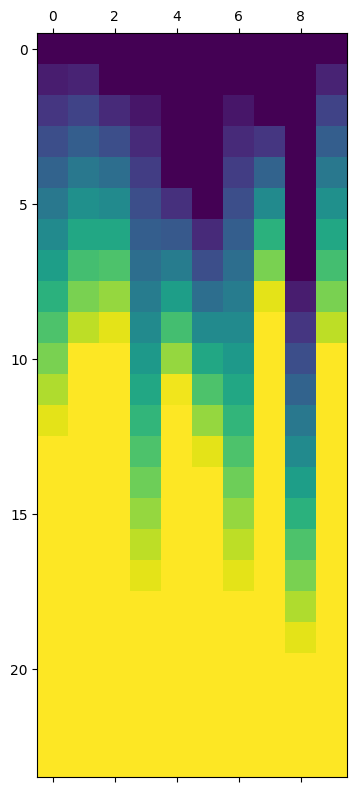

In [28]:
# Plot the results
import matplotlib.pyplot as plt

fig1 = plt.figure()
plt.matshow(dist)

# fig2 = plt.figure()
# plt.matshow(SOC)

plt.show()

In [35]:
# px = [1,2,3,4,5,6,7,8,9,10]
# print(dist)
# type(dist)
# lst=[[6,4],[5,3],[2,4]]
row=len(dist)
column=len(dist[0])
print(f'Rows:{row}, Column:{column}')
print("Shape of list:",len(dist))



Rows:24, Column:10
Shape of a list: 24


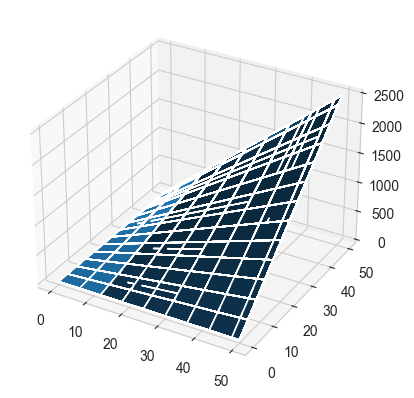

In [55]:
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np

# def FUNC_Z(x, y):
#     return 50 - (x**2 + y**2)


sb.set_style('whitegrid')
# N = 50

X_VAL = [row for row in dist]
Y_VAL = [column for column in dist]

X1, Y1 = np.meshgrid(X_VAL, Y_VAL)

Z1 =(X1 * Y1)

axes = plot.axes(projection='3d')
axes.plot_surface(X1, Y1, Z1)
plot.show()

AttributeError: 'list' object has no attribute 'ndim'

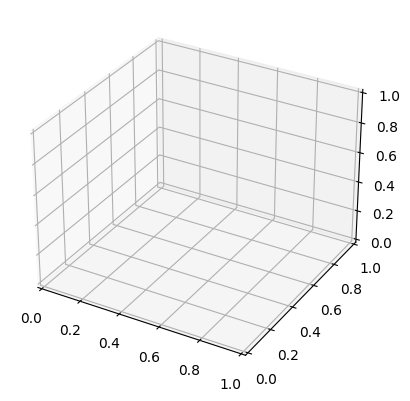

In [30]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(dist, state, init_state, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


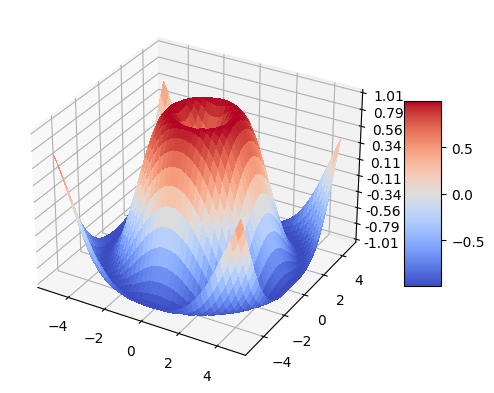

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [12]:
# a = range(2,24)
# print(a)
for i in range(2,24):
    print(i)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [13]:
# Simple example

# constants
end_dist = 50
charge_points = 2

# time varying variables
dist = [[0]*10 for i in range(24)] # initialise distance travelled
final_SOC = [80, 59, 23, 65, 34, 90, 23, 80, 100, 67] # init SOC - taken from previous day
charge_state = [[0]*10 for i in range(24)]

# const variables - could be selected by Montecarlo random selector
init_state = [[0]*10 for i in range(4)]
init_state[0] = [0, 0, 1, 1, 0, 0, 0, 0, 0, 1] # init location
init_state[1] = [1, 1, 2, 2, 5, 6, 2, 3, 8, 1] # init start time
init_state[2] = [4, 5, 6, 3, 7, 6, 3, 8, 4, 5] # init speed

state = [[0]*10 for i in range(24)] # initialise start state to 0 ie stationary at start
SOC = final_SOC[:] # take SOC from previous day

for i in range(1, 24): # hours

    # each timestep
    state[i] = [int(i >= init_state[1][j] and dist[i-1][j] < end_dist) for j in range(10)]
    dist[i] = [min(end_dist, dist[i-1][j] + state[i][j]*init_state[2][j]) for j in range(10)]
    SOC[i] = [max(0, SOC[i-1][j] - state[i][j]*init_state[2][j]) for j in range(10)]

# Plot the results
import matplotlib.pyplot as plt

fig1 = plt.figure()
plt.matshow(dist)

fig2 = plt.figure()
plt.matshow(SOC)

plt.show()


TypeError: 'int' object is not subscriptable